# Galaxy Zoo

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Project_GalaxyZoo-galaxypic.png" width=500></img>
</div>

## <span style="color:Orange">Overview</span>

Understanding how and why we are here is one of the fundamental questions for the ages. Part of the answer to this question lies in the origins of galaxies, such as our own Milky Way. Yet questions remain about how the Milky Way (or any of the other ~100 billion galaxies in our Universe) was formed and has evolved. Galaxies come in all shapes, sizes and colors: from beautiful spirals to huge ellipticals. “Kevin Schawinski, previously an astrophysicist at Oxford University and co-founder of Galaxy Zoo, described the problem that led to Galaxy Zoo's creation when he was set the task of classifying the morphology of more than 900,000 galaxies by eye that had been imaged by the Sloan Digital Sky Survey at the Apache Point Observatory in New Mexico, USA.”

## <span style="color:Orange">Data Sources</span>

Original Source
* https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge/data (requires Kaggle account)

File URLs
* https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/GalaxyZoo/all_ones_benchmark.zip
* https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/GalaxyZoo/all_zeros_benchmark.zip
* https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/GalaxyZoo/central_pixel_benchmark.zip
* https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/GalaxyZoo/images_test_rev1.zip
* https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/GalaxyZoo/images_training_rev1.zip
* https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/GalaxyZoo/training_solutions_rev1.zip

## <span style="color:Orange">Questions</span>

### <span style="color:LightGreen">Question 01</span>

What is the Sky Survey? What motivated scientists to create such a survey?

## Answer for Question 01

The **Sloan Digital Sky Survey (SDSS)** is a large project that systematically maps the night sky using digital imaging and spectroscopy.  
It provides uniform and precise data for millions of celestial objects such as stars and galaxies.  
Scientists created this survey to replace small, inconsistent observations with a complete, statistically meaningful sample.  
Because the dataset was enormous, projects like **Galaxy Zoo** were developed to let volunteers visually classify galaxies and make large-scale morphology studies possible.



### <span style="color:LightGreen">Question 02</span>

Galaxy Zoo guides its citizen scientists through a nested decision tree - this is what constitutes the classification process. ​Why is it important to be able to classify galaxies? Why are the different shapes of galaxies so important? What information is provided from different galaxy colors?

## Answer for Question 02

Galaxy classification helps astronomers understand how galaxies form and evolve.  
Different morphologies correspond to different physical histories:  
ellipticals are generally red, old, and merger-formed, while spirals are blue, gas-rich, and still forming stars.  
Color also indicates stellar population and star-formation activity.  
By linking morphology and color, scientists can study the connection between structure, stellar age, and environment.


### <span style="color:LightGreen">Question 03</span>

After reading a thorough reading of the paper in [[1]](https://arxiv.org/pdf/1308.3496.pdf), ​describe what constitutes the decision tree. What are the conditions described in the decision tree?

## Answer for Question 03

The **decision tree** in **Galaxy Zoo 2** is a structured series of classification questions shown to each volunteer.  
It begins with “Is the galaxy smooth or does it have features or a disk?” and then branches into more specific tasks, such as checking for bars, spiral arms, or bulges.  
There are **11 main questions** and **37 total possible responses**.  
Each step depends on previous answers — for example, the bar question appears only if the galaxy was identified as a face-on disk.  
This conditional design ensures detailed and consistent morphological information across all classifications.


### <span style="color:LightGreen">Question 04</span>

Download file `central_pixel_benchmark.zip` from either of the data source locations above.

The header of the Benchmark data looks something like this:

```
GalaxyID,
Class1.1, Class1.2, Class1.3,
Class2.1, Class2.2,
Class3.1, Class3.2,
Class4.1, Class4.2,
Class5.1, Class5.2, Class5.3, Class5.4,
Class6.1, Class6.2,
Class7.1, Class7.2, Class7.3,
Class8.1, Class8.2, Class8.3, Class8.4, Class8.5, Class8.6, Class8.7,
Class9.1, Class9.2, Class9.3,
Class10.1, Class10.2, Class10.3,
Class11.1, Class11.2, Class11.3, Class11.4, Class11.5, Class11.6
```
Label each class number with each corresponding decision tree conditions.


## Solution for Question 04
### 1. getting data

In [2]:
import pandas as pd
import os, subprocess

def wget_data(url: str):
    local_path = './tmp_data'
    p = subprocess.Popen(["wget", "-nc", "-P", local_path, url], stderr=subprocess.PIPE, encoding='utf-8')
    rc = None
    while rc is None:
        line = p.stderr.readline().strip('\n')
        if len(line) > 0:
            print(line)
        rc = p.poll()

def locate_data(name, check_exists=True):
    local_path = './tmp_data'
    path = os.path.join(local_path, name)
    if check_exists and not os.path.exists(path):
        raise RuntimeError('No such data file: {}'.format(path))
    return path

wget_data('https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/GalaxyZoo/central_pixel_benchmark.zip')
!unzip -q ./tmp_data/central_pixel_benchmark.zip -d ./tmp_data

data = pd.read_csv(locate_data('central_pixel_benchmark.csv'))
print("Loaded dataset:", data.shape)
print("Columns:", data.columns.tolist())
data.head()


--2025-10-21 06:32:05--  https://courses.physics.illinois.edu/phys498mlp/sp2025/data/projects/GalaxyZoo/central_pixel_benchmark.zip
Resolving courses.physics.illinois.edu (courses.physics.illinois.edu)... 130.126.151.14
Connecting to courses.physics.illinois.edu (courses.physics.illinois.edu)|130.126.151.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 532227 (520K) [application/x-zip-compressed]
Saving to: ‘./tmp_data/central_pixel_benchmark.zip’
     0K .......... .......... .......... .......... ..........  9%  470K 1s
    50K .......... .......... .......... .......... .......... 19%  894K 1s
   100K .......... .......... .......... .......... .......... 28% 1022K 1s
   150K .......... .......... .......... .......... .......... 38% 12.8M 0s
   200K .......... .......... .......... .......... .......... 48% 1002K 0s
   250K .......... .......... .......... .......... .......... 57%  304M 0s
   300K .......... .......... .......... .......... .......... 6

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100018,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
1,100037,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0
2,100042,0.408863,0.550817,0.040320,0.085001,0.465816,0.117082,0.348734,0.225783,0.240033,...,0.054510,0.068422,0.087200,0.070161,0.028580,0.094907,0.017221,0.007030,0.004902,0
3,100052,0.322002,0.657280,0.020718,0.136922,0.520358,0.121784,0.398573,0.310370,0.209988,...,0.058241,0.128488,0.123550,0.058332,0.021707,0.140455,0.028082,0.011659,0.008495,0
4,100056,0.468481,0.506185,0.025334,0.099844,0.406341,0.095167,0.311174,0.185080,0.221262,...,0.023420,0.082314,0.071253,0.031512,0.012281,0.079964,0.014346,0.006369,0.006649,0


### 2. Label each class number with each corresponding decision tree conditions.

In [3]:
# labels
labels = {
    'Class1.1':'Task01: Is the galaxy simply smooth and rounded, with no sign of a disk? -> smooth',
    'Class1.2':'Task01: Is the galaxy simply smooth and rounded, with no sign of a disk? -> features or disk',
    'Class1.3':'Task01: Is the galaxy simply smooth and rounded, with no sign of a disk? -> star or artifact',
    'Class2.1':'Task02: Could this be a disk viewed edge-on? -> yes',
    'Class2.2':'Task02: Could this be a disk viewed edge-on? -> no',
    'Class3.1':'Task03: Is there a sign of a bar feature through the centre of the galaxy? -> yes',
    'Class3.2':'Task03: Is there a sign of a bar feature through the centre of the galaxy? -> no',
    'Class4.1':'Task04: Is there any sign of a spiral arm pattern? -> yes',
    'Class4.2':'Task04: Is there any sign of a spiral arm pattern? -> no',
    'Class5.1':'Task05: How prominent is the central bulge, compared with the rest of the galaxy? -> no bulge',
    'Class5.2':'Task05: How prominent is the central bulge, compared with the rest of the galaxy? -> just noticeable',
    'Class5.3':'Task05: How prominent is the central bulge, compared with the rest of the galaxy? -> obvious',
    'Class5.4':'Task05: How prominent is the central bulge, compared with the rest of the galaxy? -> dominant',
    'Class6.1':'Task06: Is there anything odd? -> yes',
    'Class6.2':'Task06: Is there anything odd? -> no',
    'Class7.1':'Task07: How rounded is it? -> completely round',
    'Class7.2':'Task07: How rounded is it? -> in between',
    'Class7.3':'Task07: How rounded is it? -> cigar-shaped',
    'Class8.1':'Task08: Is the odd feature a ring, or is the galaxy disturbed or irregular? -> ring',
    'Class8.2':'Task08: Is the odd feature a ring, or is the galaxy disturbed or irregular? -> lens or arc',
    'Class8.3':'Task08: Is the odd feature a ring, or is the galaxy disturbed or irregular? -> disturbed',
    'Class8.4':'Task08: Is the odd feature a ring, or is the galaxy disturbed or irregular? -> irregular',
    'Class8.5':'Task08: Is the odd feature a ring, or is the galaxy disturbed or irregular? -> other',
    'Class8.6':'Task08: Is the odd feature a ring, or is the galaxy disturbed or irregular? -> merger',
    'Class8.7':'Task08: Is the odd feature a ring, or is the galaxy disturbed or irregular? -> dust lane',
    'Class9.1':'Task09: Does the galaxy have a bulge at its centre? If so, what shape? -> rounded',
    'Class9.2':'Task09: Does the galaxy have a bulge at its centre? If so, what shape? -> boxy',
    'Class9.3':'Task09: Does the galaxy have a bulge at its centre? If so, what shape? -> no bulge',
    'Class10.1':'Task10: How tightly wound do the spiral arms appear? -> tight',
    'Class10.2':'Task10: How tightly wound do the spiral arms appear? -> medium',
    'Class10.3':'Task10: How tightly wound do the spiral arms appear? -> loose',
    'Class11.1':'Task11: How many spiral arms are there? -> 1',
    'Class11.2':'Task11: How many spiral arms are there? -> 2',
    'Class11.3':'Task11: How many spiral arms are there? -> 3',
    'Class11.4':'Task11: How many spiral arms are there? -> 4',
    'Class11.5':'Task11: How many spiral arms are there? -> more than four',
    'Class11.6':'Task11: How many spiral arms are there? -> can’t tell',
}

# Next transitions (from Table 2)
tree = {
    'Task01': [('Class1.1','Task07'), ('Class1.2','Task02'), ('Class1.3','end')],
    'Task02': [('Class2.1','Task09'), ('Class2.2','Task03')],
    'Task03': [('Class3.1','Task04'), ('Class3.2','Task04')],
    'Task04': [('Class4.1','Task10'), ('Class4.2','Task05')],
    'Task05': [('Class5.1','Task06'), ('Class5.2','Task06'), ('Class5.3','Task06'), ('Class5.4','Task06')],
    'Task06': [('Class6.1','Task08'), ('Class6.2','end')],
    'Task07': [('Class7.1','Task06'), ('Class7.2','Task06'), ('Class7.3','Task06')],
    'Task08': [('Class8.1','end'), ('Class8.2','end'), ('Class8.3','end'), ('Class8.4','end'),
               ('Class8.5','end'), ('Class8.6','end'), ('Class8.7','end')],
    'Task09': [('Class9.1','Task06'), ('Class9.2','Task06'), ('Class9.3','Task06')],
    'Task10': [('Class10.1','Task11'), ('Class10.2','Task11'), ('Class10.3','Task11')],
    'Task11': [('Class11.1','Task05'), ('Class11.2','Task05'), ('Class11.3','Task05'),
               ('Class11.4','Task05'), ('Class11.5','Task05'), ('Class11.6','Task05')],
}
print('labels:', labels)
print('tree:', tree)

labels: {'Class1.1': 'Task01: Is the galaxy simply smooth and rounded, with no sign of a disk? -> smooth', 'Class1.2': 'Task01: Is the galaxy simply smooth and rounded, with no sign of a disk? -> features or disk', 'Class1.3': 'Task01: Is the galaxy simply smooth and rounded, with no sign of a disk? -> star or artifact', 'Class2.1': 'Task02: Could this be a disk viewed edge-on? -> yes', 'Class2.2': 'Task02: Could this be a disk viewed edge-on? -> no', 'Class3.1': 'Task03: Is there a sign of a bar feature through the centre of the galaxy? -> yes', 'Class3.2': 'Task03: Is there a sign of a bar feature through the centre of the galaxy? -> no', 'Class4.1': 'Task04: Is there any sign of a spiral arm pattern? -> yes', 'Class4.2': 'Task04: Is there any sign of a spiral arm pattern? -> no', 'Class5.1': 'Task05: How prominent is the central bulge, compared with the rest of the galaxy? -> no bulge', 'Class5.2': 'Task05: How prominent is the central bulge, compared with the rest of the galaxy? ->

### <span style="color:LightGreen">Question 05</span>

Sample data would look something like the following:

```
100018,
0.468481225, 0.506184901, 0.025333873,
0.099843579, 0.406341321,
0.095166943, 0.311174378,
0.185079516, 0.221261805,
0.019014618, 0.157050124, 0.194385937, 0.035890642,
0.214294993, 0.785705007,
0.195926631, 0.221751402, 0.050803194,
0.038988255, 0.014478764, 0.027519262, 0.023837245, 0.063030884, 0.043247289, 0.003193269,
0.066031673, 0.010392192, 0.023419713,
0.082313979, 0.07125346, 0.031512075,
0.012281073, 0.079963984, 0.01434553, 0.006368535, 0.006648832, 0
```

The first one is the `GalaxyID` and the following are the probabilities of each node. Can you tell what is the most likely (highest likelihood) Class for this galaxy?

## Solution for Question 05

In [4]:
# depth-first search for the best path (separate function)
def dfs_path(row, task, prob, path):
    if task == 'end':
        return prob, path
    best_prob, best_path = 0.0, []
    for cls, nxt in tree[task]:
        p = float(row[cls])
        cand_prob, cand_path = dfs_path(row, nxt, prob * p, path + [(cls, p, nxt)])
        if cand_prob > best_prob:
            best_prob, best_path = cand_prob, cand_path
    return best_prob, best_path


# wrapper for a single row
def best_path_for_row(row):
    return dfs_path(row, 'Task01', 1.0, [])


# classify one GalaxyID
def classify_gid(gid):
    r = data.loc[data['GalaxyID'] == gid]
    if r.empty:
        return None
    r = r.iloc[0]
    prob, path = best_path_for_row(r)
    leaf = path[-1][0]
    return {
        'GalaxyID': gid,
        'best_leaf_class': leaf,
        'best_leaf_prob': prob,
        'best_leaf_label': labels[leaf],
        'path': path
    }

# example: the sample GalaxyID in the prompt
res = classify_gid(100018)
res


{'GalaxyID': 100018,
 'best_leaf_class': 'Class6.2',
 'best_leaf_prob': 0.0816240398536905,
 'best_leaf_label': 'Task06: Is there anything odd? -> no',
 'path': [('Class1.1', 0.468481225, 'Task07'),
  ('Class7.2', 0.221751402, 'Task06'),
  ('Class6.2', 0.785705007, 'end')]}

### <span style="color:LightGreen">Question 06</span>

Draw the classification distribution histogram. Can you tell which type of Galaxy is the majority distribution?

## Solution for Question 06

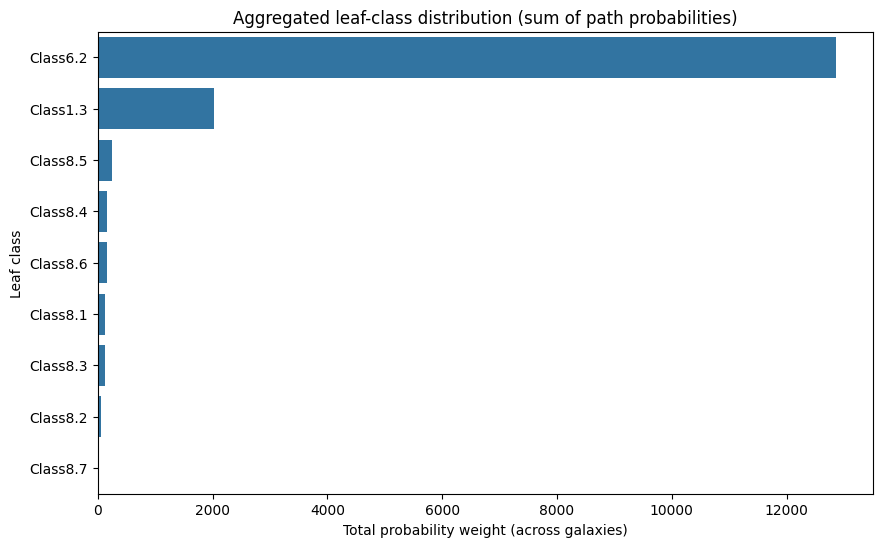

Majority leaf class: Class6.2
Description: Task06: Is there anything odd? -> no
Total weight: 12860.449669575113


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sum of leaf probabilities for one row
# depth-first search to accumulate leaf probabilities
def dfs_leaf_probs(row, task, prob, last_cls, acc):
    if task == 'end':
        if last_cls is not None:
            acc[last_cls] = acc.get(last_cls, 0.0) + prob
        return
    for cls, nxt in tree[task]:
        p = float(row[cls])
        dfs_leaf_probs(row, nxt, prob * p, cls, acc)

# wrapper for one galaxy (row)
def leaf_prob_dist_for_row(row):
    acc = {}
    dfs_leaf_probs(row, 'Task01', 1.0, None, acc)
    return acc  # dict: {leaf_class: probability}

# accumulate over all galaxies (can set n=None for all)
def aggregate_leaf_distribution(df, n=None):
    total = {}
    it = df if n is None else df.head(n)
    for _, row in it.iterrows():
        dist = leaf_prob_dist_for_row(row)
        for k, v in dist.items():
            total[k] = total.get(k, 0.0) + v
    out = pd.Series(total, name='weight').sort_values(ascending=False)
    return out

# compute aggregated distribution
agg = aggregate_leaf_distribution(data)   #  aggregate_leaf_distribution(data, n=50000)
dist_df = agg.rename_axis('leaf').reset_index()
dist_df['label'] = dist_df['leaf'].map(labels)

# plot
plt.figure(figsize=(10,6))
sns.barplot(data=dist_df, y='leaf', x='weight', order=dist_df['leaf'])
plt.title('Aggregated leaf-class distribution (sum of path probabilities)')
plt.xlabel('Total probability weight (across galaxies)')
plt.ylabel('Leaf class')
plt.show()

# majority leaf (highest total weight)
major_leaf = dist_df.iloc[0]['leaf']
print("Majority leaf class:", major_leaf)
print("Description:", labels[major_leaf])
print("Total weight:", float(dist_df.iloc[0]['weight']))


/tmp/ipython-input-315010411.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


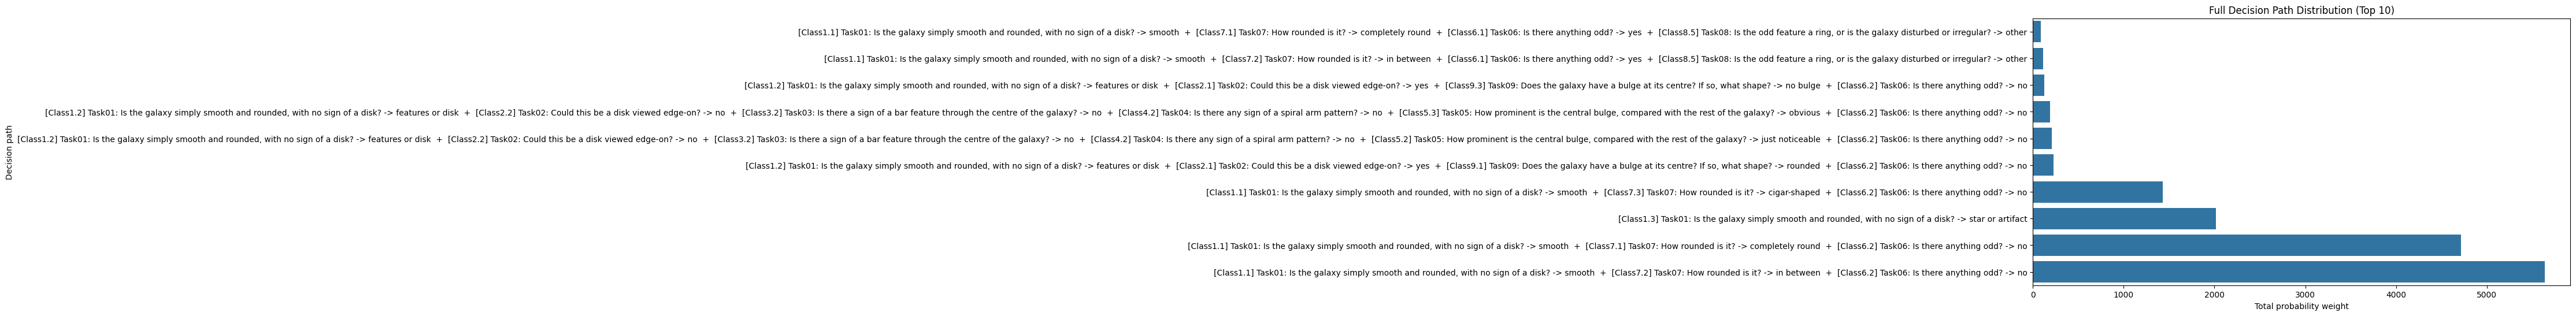

Most probable full path:
[Class1.1] Task01: Is the galaxy simply smooth and rounded, with no sign of a disk? -> smooth  +  [Class7.2] Task07: How rounded is it? -> in between  +  [Class6.2] Task06: Is there anything odd? -> no
Total weight: 5638.36691236546


In [6]:
def dfs_collect_full_paths(row, task, prob, path_codes, acc):
    """
    Full path DFS: record the entire ClassX.Y chain until 'end'
    row: current galaxy row
    task: current task name (e.g. 'Task01')
    prob: cumulative path probability so far
    path_codes: list of class codes visited so far
    acc: dict mapping full path label -> aggregated probability
    """
    if task == 'end':
        if path_codes:
            # Build a readable label: [Code] Text + [Code] Text + ...
            chunks = []
            for code in path_codes:
                human = labels.get(code, None)
                if human is None:
                    chunks.append(f"[{code}]")
                else:
                    chunks.append(f"[{code}] {human}")
            label = "  +  ".join(chunks)
            acc[label] = acc.get(label, 0.0) + prob
        return

    # Otherwise, branch through tree
    for code, nxt in tree[task]:
        p = float(row.get(code, 0.0))
        if p <= 0.0:
            continue
        dfs_collect_full_paths(row, nxt, prob * p, path_codes + [code], acc)


def path_prob_dist_for_row(row):
    """
    Return full decision path distribution for one galaxy.
    e.g. { "[Class1.1] ... + [Class7.1] ...": 0.123, ... }
    """
    acc = {}
    dfs_collect_full_paths(row, 'Task01', 1.0, [], acc)
    return acc


def aggregate_path_distribution(df, n=None):
    """
    Aggregate full decision path distributions over multiple galaxies.
    Return Series: index = full path label, value = total probability weight.
    """
    total = {}
    it = df if n is None else df.head(n)
    for _, row in it.iterrows():
        dist = path_prob_dist_for_row(row)
        for k, v in dist.items():
            total[k] = total.get(k, 0.0) + v
    return pd.Series(total, name='weight').sort_values(ascending=False)


# Example usage (you can adjust n or remove it)
agg_paths = aggregate_path_distribution(data)
path_df = agg_paths.rename_axis('path').reset_index()

# Plot (top-K)
TOP_K = 10
plot_df = path_df.head(TOP_K).iloc[::-1]

plt.figure(figsize=(12, max(6, 0.35 * len(plot_df))))
sns.barplot(data=plot_df, y='path', x='weight', order=plot_df['path'])
plt.title(f'Full Decision Path Distribution (Top {len(plot_df)})')
plt.xlabel('Total probability weight')
plt.ylabel('Decision path')
plt.tight_layout()
plt.show()

# Print the most common path
print("Most probable full path:")
print(path_df.iloc[0]['path'])
print("Total weight:", float(path_df.iloc[0]['weight']))


## <span style="color:Orange">References</span>

__[<span style="color:Red">1</span>]__ K.W. Willet, _et.al_, "Galaxy Zoo 2: detailed morphological classifications for 304,122 galaxies from the Sloan Digital Sky Survey", _Mon.Not.Roy.Astron.Soc_. 435 (2013) 2835, e-Print: [1308.3496](https://arxiv.org/abs/1308.3496) [astro-ph.CO]

## <span style="color:Orange">Acknowledgements</span>

* Initial version: Mark Neubauer

© Copyright 2025